In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('C:\\Users\\ACER\\OneDrive\\Desktop\\PythonDesk\\CaseStudy\\Case Study 4 - Python Visualizations Case Study')
##pd.options.display.float_format = '{:.0f}'.format

In [4]:
sales_df = pd.read_csv('SalesData.csv')

In [6]:
sales_df.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


## EDA

In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [9]:
## Data types are correct

In [10]:
sales_df.shape

(3709, 14)

In [11]:
sales_df.isnull().sum()

AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

In [12]:
## No NULL values present

In [13]:
sales_df.duplicated().sum()

0

In [14]:
## No Duplicates present

In [16]:
sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountId,3709.0,77165.352925,241761.490209,1116.00,3774.00,6500.0000,10419.00,1219499.00
Sales2015,3709.0,6134.912371,9195.070153,-11053.44,0.00,3128.3400,7837.54,145760.12
Sales2016,3709.0,7998.039527,11130.551032,-59090.81,1886.69,3918.7700,10122.40,168033.36
Units2015,3709.0,2.293567,3.659052,-3.00,0.00,1.0000,3.00,53.00
Units2016,3709.0,3.007910,4.313730,-17.00,1.00,1.8333,4.00,61.00
TargetAchevied2015,3709.0,1.067396,0.211269,0.70,0.88,1.0700,1.25,1.42
TargetAchevied2016,3709.0,1.242354,0.192727,0.91,1.08,1.2400,1.41,1.57


In [17]:
## Columns Sales2016, Sales2015, Units2015, Units2016 have NEGATIVE values

In [18]:
sales_df.describe(include= 'object').T

,count,unique,top,freq
AccountName,3709,2293,Account98,12
Region,3709,3,Central,1374
Division,3709,26,HAILSTORM,206
City,3709,203,FAYETTEVILLE,40
State,3709,44,TX,333
Tier,3709,4,High,1984
Month,3709,12,Jan,328


In [19]:
## Most frequent Region - Central
## Most frequent City - FAYETTEVILLE
## Most frequent Division - HAILSTORM
## Most frequent State - TX
## Jan month has most transactions of all

In [20]:
## Checking inconsistency in data

In [21]:
Categorical_columns= sales_df.select_dtypes(include= 'object').columns
for i in Categorical_columns:
    print(sales_df[i].value_counts())
    print(end='\n')

AccountName
Account98      12
Account524     10
Account1870     8
Account43       8
Account1519     8
               ..
Account484      1
Account1497     1
Account1496     1
Account486      1
Account2750     1
Name: count, Length: 2293, dtype: int64

Region
Central    1374
East       1336
West        999
Name: count, dtype: int64

Division
HAILSTORM         206
MUDDY WATERS      192
STAMPEDE          191
TORNADO VALLEY    165
NORDIC            165
GULF STREAM       161
SYNERGY           160
SOUTHERN STAR     159
MINUTEMEN         157
WRANGLER          152
DIAMONDBACK       149
ORION             145
EMPIRE            145
KINETIC           141
CHARGERS          133
GRIDIRON          132
RACEWAY           130
VICTORY           126
REVOLUTION        124
THE CAROLINAS     121
NORTHWEST         117
WAVE RIDER        117
WOLVERINE         112
RIPTIDE           112
BIG APPLE         102
CONGRESSIONAL      95
Name: count, dtype: int64

City
FAYETTEVILLE      40
GREENVILLE        38
WICHITA     

In [22]:
## There are no discrepencies in the categorical data

# Univariate analysis

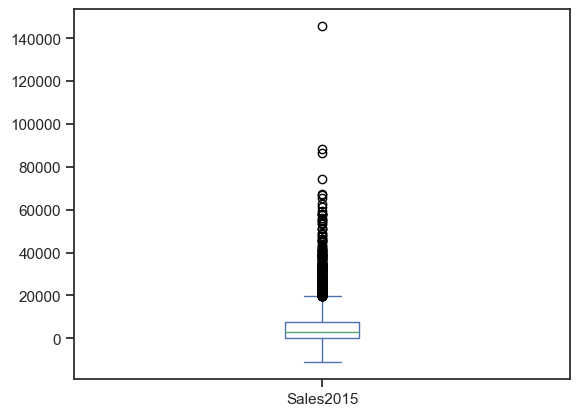

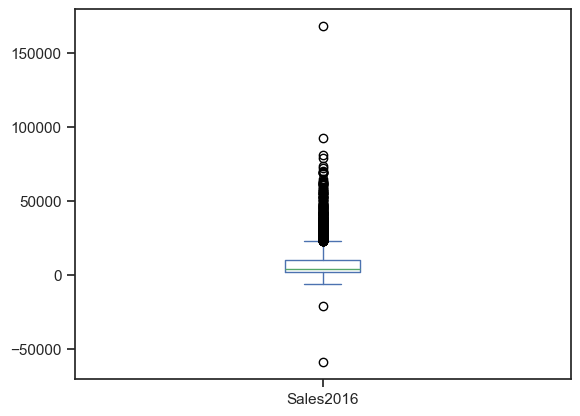

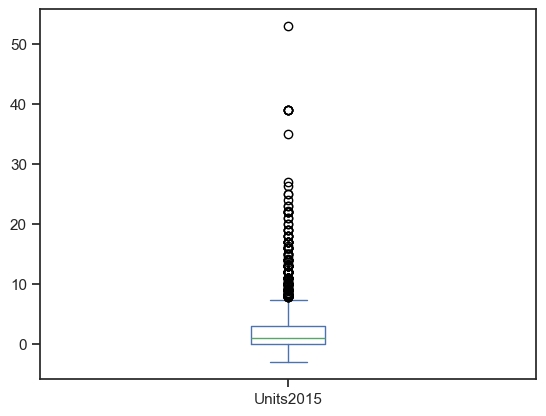

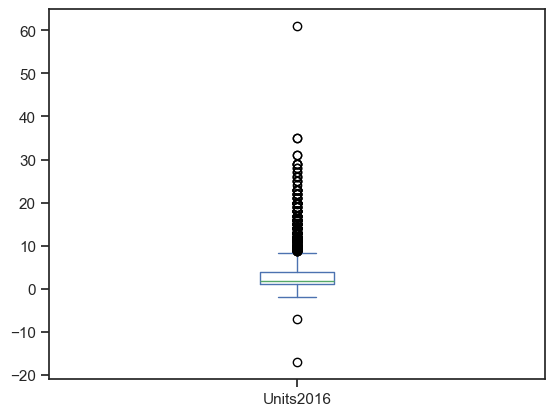

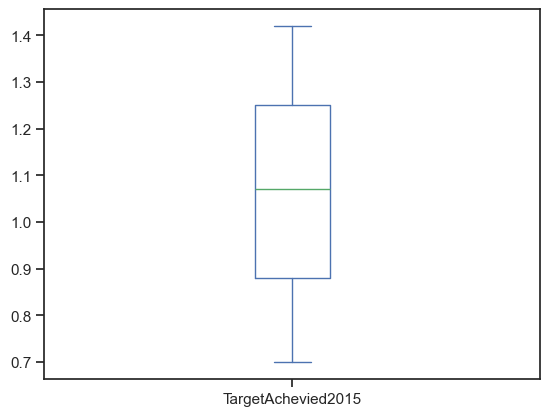

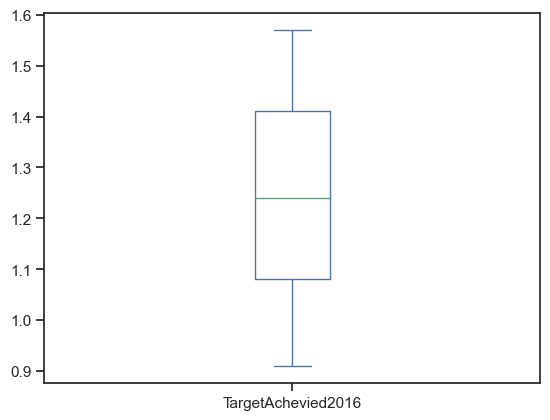

In [24]:
for i in sales_df.select_dtypes('number').drop(columns=['AccountId']).columns:
    sales_df[i].plot(kind='box')
    plt.show()

In [25]:
## Columns Sales2015, Salse2016, Unit2015 and Unit2016 have outliers present

## OUTLIER TREATMENT

In [26]:
for i in sales_df.select_dtypes('number').drop(columns=['AccountId']).columns:
    Q1 = sales_df[i].quantile(0.25)
    Q3 = sales_df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_ = Q1 - (1.5*IQR)
    upper_ = Q3 + (1.5*IQR)
    sales_df[i] = sales_df[i].clip(lower = lower_, upper = upper_)

In [27]:
## Verify again outliers presence by creating boxplot again

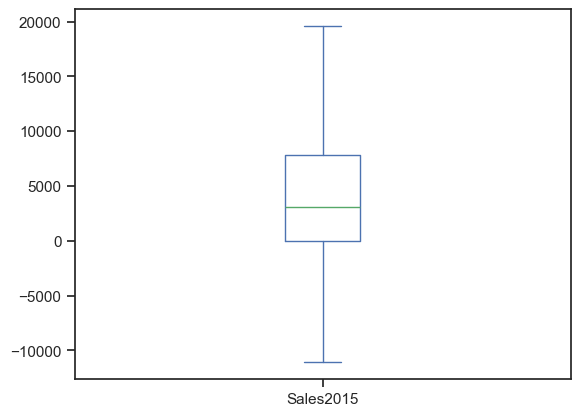

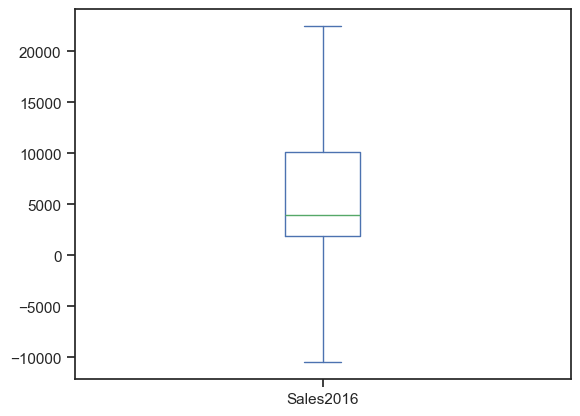

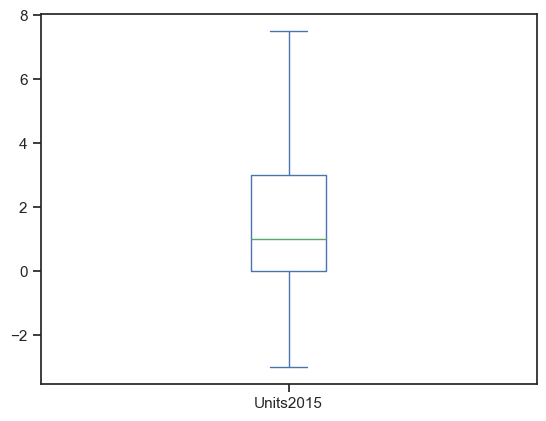

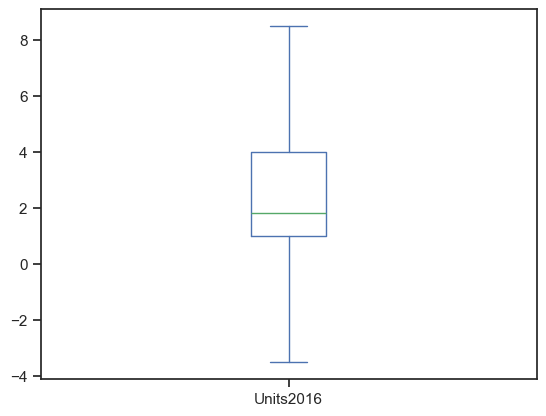

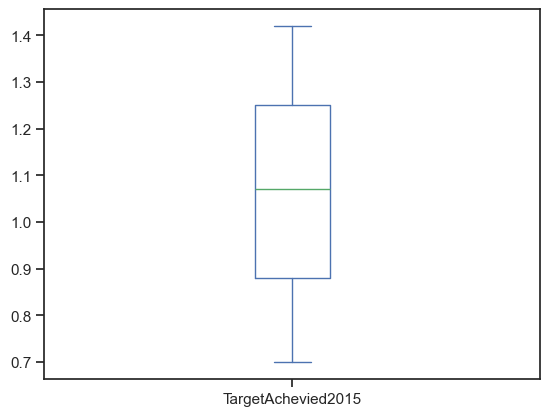

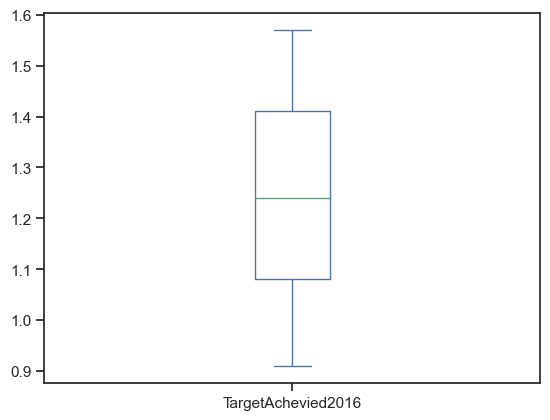

In [28]:
for i in sales_df.select_dtypes('number').drop(columns=['AccountId']).columns:
    sales_df[i].plot(kind='box')
    plt.show()

In [29]:
## HISTOGRAMS

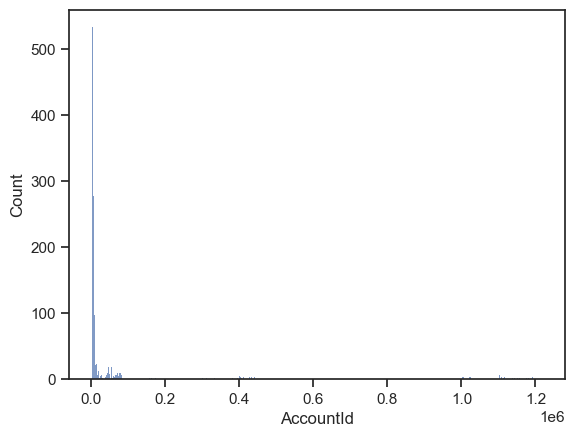

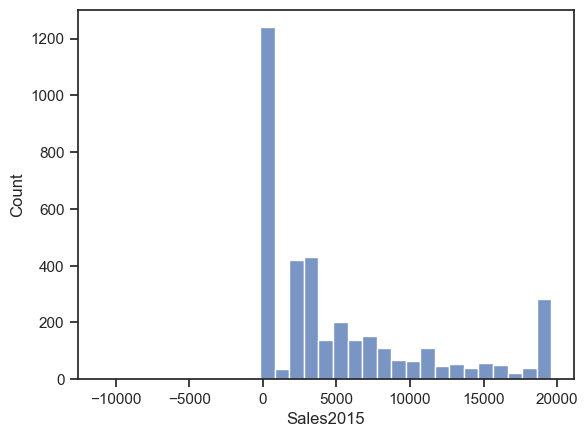

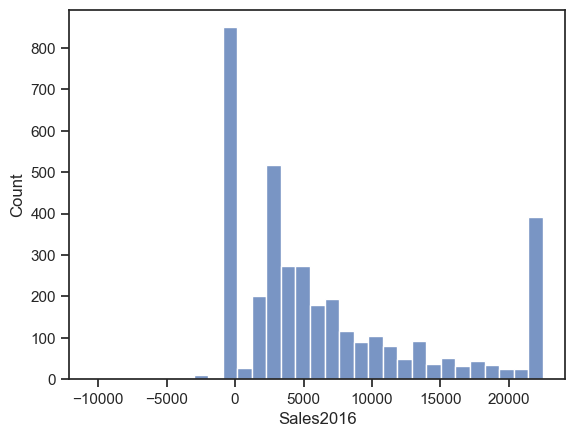

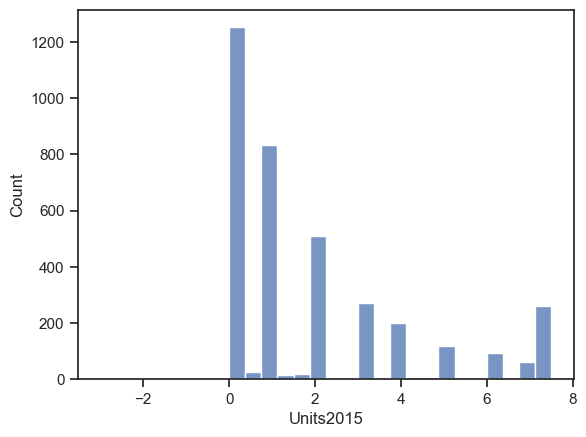

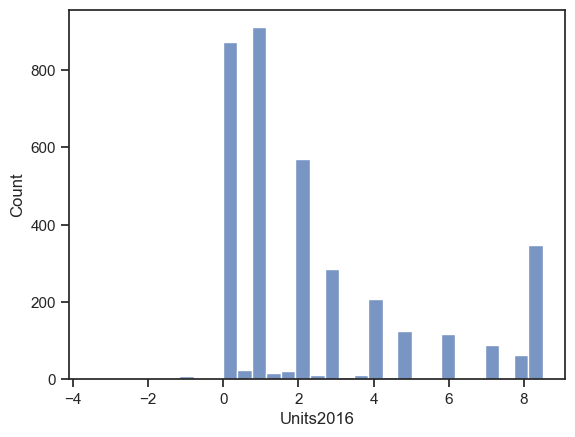

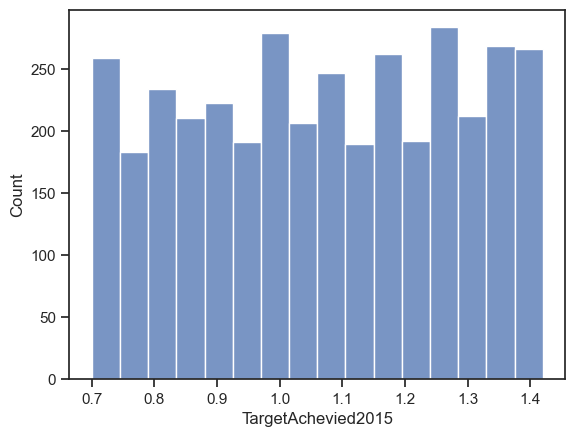

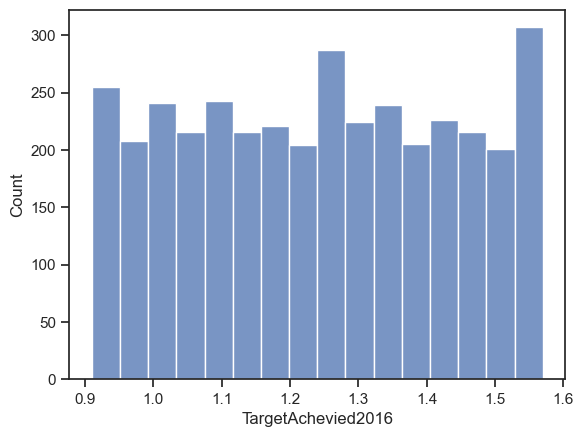

In [30]:
numeric_cols= sales_df.select_dtypes('number').columns
for i in numeric_cols:
    sns.histplot(data= sales_df, x= sales_df[i])
    plt.show()

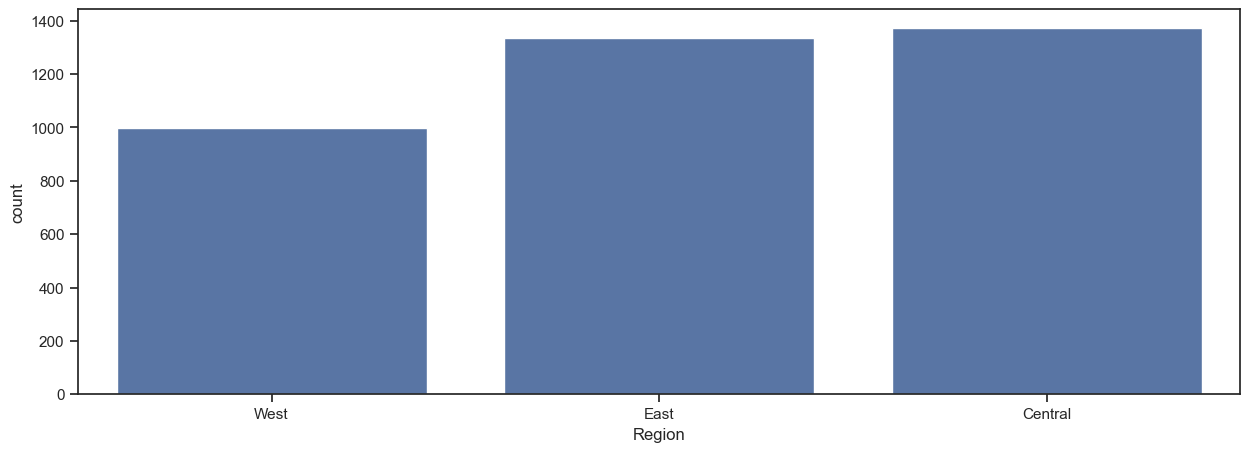

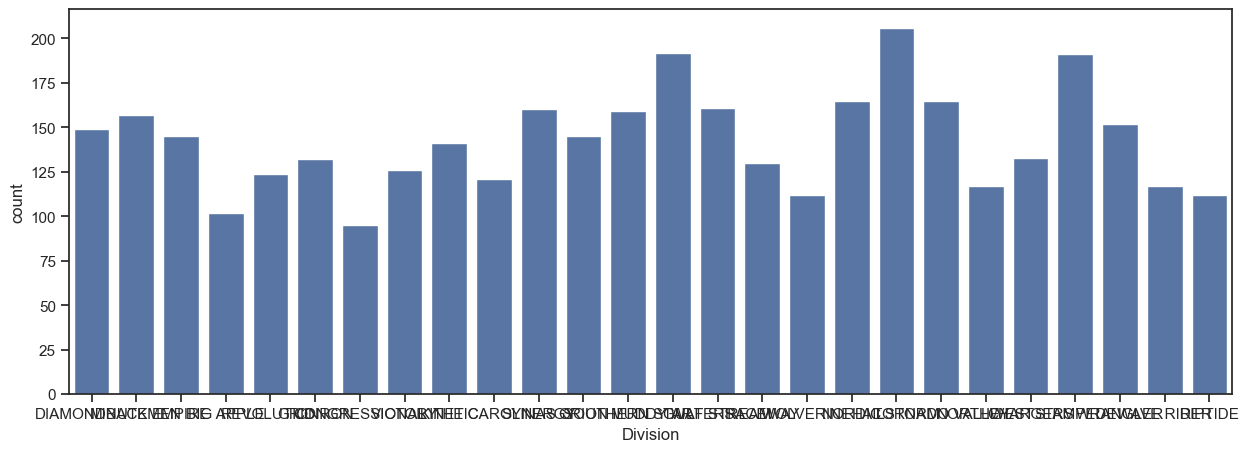

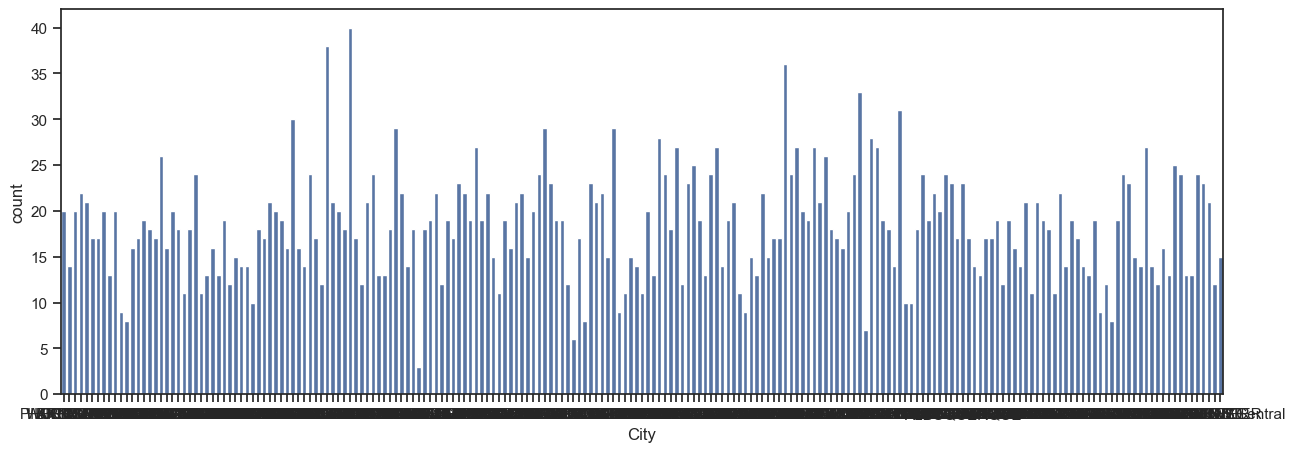

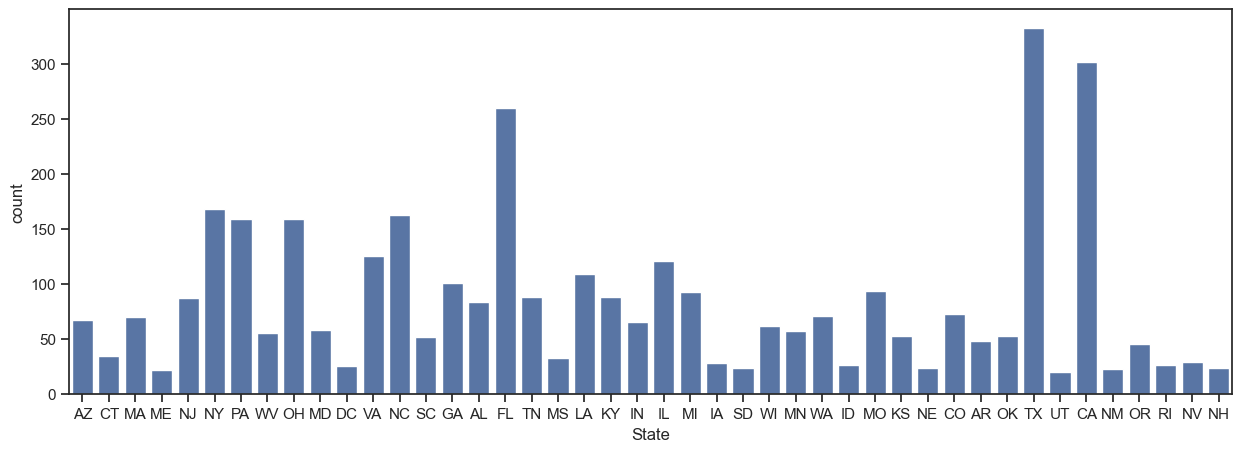

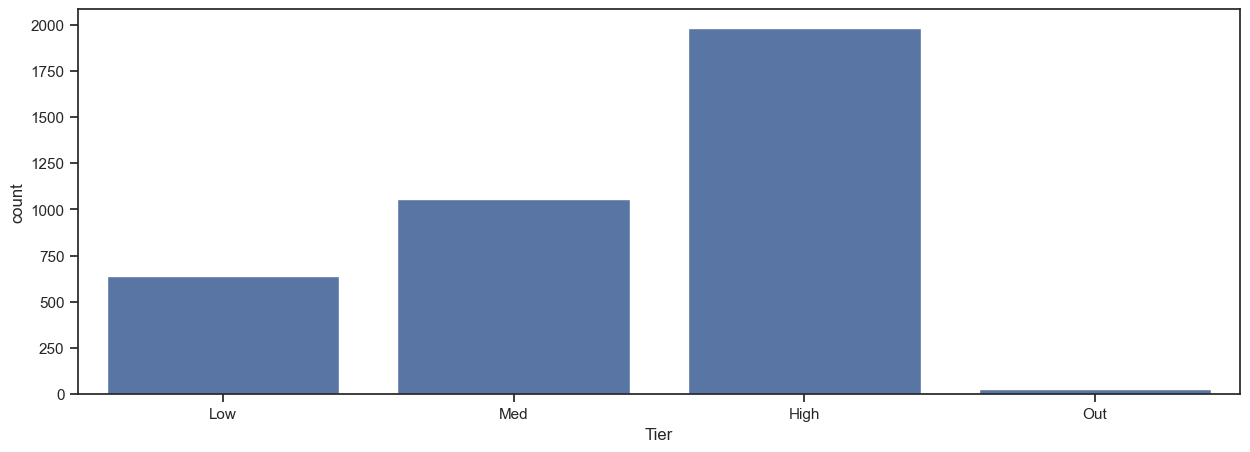

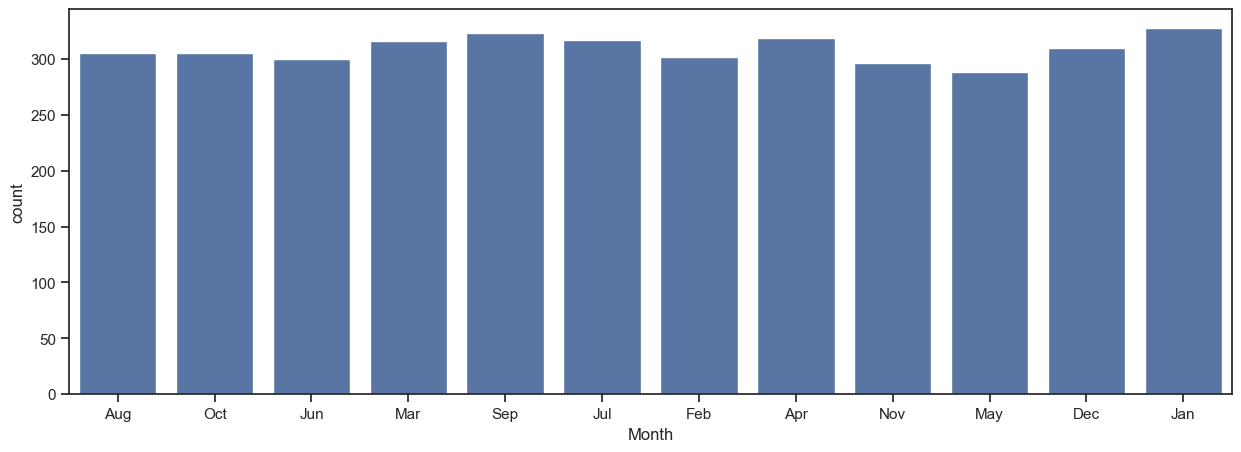

In [32]:
cat_cols = sales_df.select_dtypes(include= 'object').drop(columns='AccountName').columns
for i in cat_cols:
    plt.figure(figsize= (15,5))
    sns.countplot(data= sales_df, x= i)
    plt.show()

## Bivariate Analysis

In [34]:
num_cols= sales_df.select_dtypes('number').drop(columns='AccountId', axis=1)
num_cols.corr()

,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
Sales2015,1.000000,0.508559,0.980152,0.503247,0.003006,0.045328
Sales2016,0.508559,1.000000,0.505558,0.979398,-0.011433,0.010077
Units2015,0.980152,0.505558,1.000000,0.516537,0.004529,0.049384
Units2016,0.503247,0.979398,0.516537,1.000000,-0.012471,0.011680
TargetAchevied2015,0.003006,-0.011433,0.004529,-0.012471,1.000000,-0.007730
TargetAchevied2016,0.045328,0.010077,0.049384,0.011680,-0.007730,1.000000


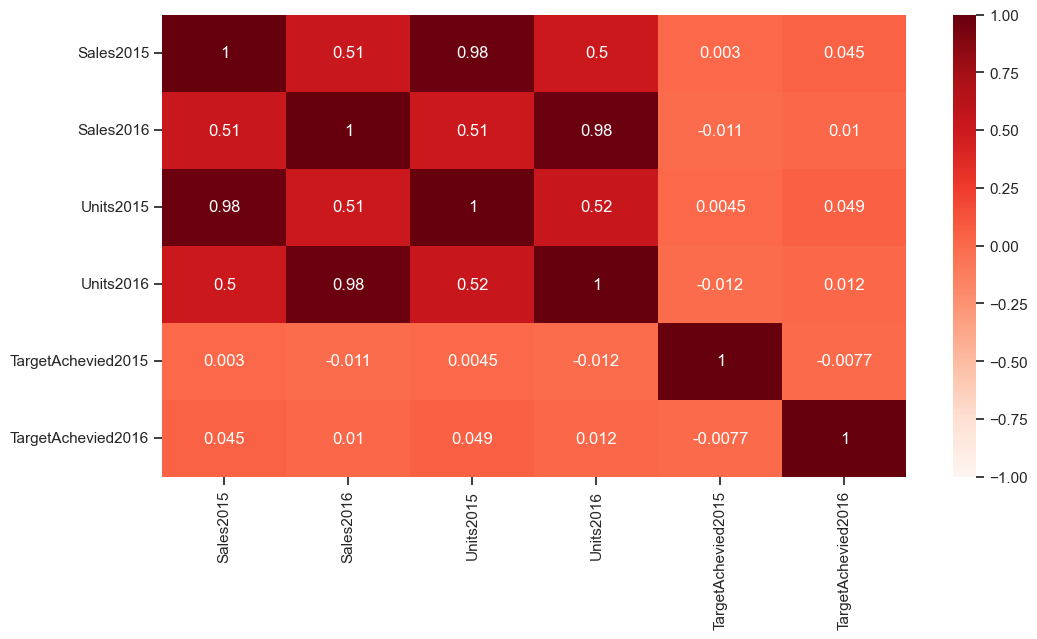

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(data = num_cols.corr(), annot=True, vmin=-1, vmax=1, cmap='Reds')
plt.show()

Sales2015 and Units2015 have highest correlation ALSO
Units 2016 and Sales2016 have highest correlation

TargetAchieved2015 and TargetAchieved2016 have least correlation

## One hot Encoding

In [49]:
Cat_columns= sales_df.select_dtypes(include= 'object')

In [48]:
Cat_columns

,AccountName,Region,Division,City,State,Tier,Month
0,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug
1,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct
2,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun
3,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar
4,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep
...,...,...,...,...,...,...,...
3704,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb
3705,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug
3706,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov
3707,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan


In [52]:
pd.get_dummies(data = Cat_columns, drop_first=True, dtype=int)

,AccountName_Account10,AccountName_Account100,AccountName_Account1000,AccountName_Account1001,AccountName_Account1002,AccountName_Account1003,AccountName_Account1004,AccountName_Account1005,AccountName_Account1006,AccountName_Account1007,...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3707,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Label Encoding - Categorical Columns

In [67]:
Cat_columns

,AccountName,Region,Division,City,State,Tier,Month
0,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug
1,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct
2,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun
3,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar
4,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep
...,...,...,...,...,...,...,...
3704,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb
3705,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug
3706,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov
3707,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan


In [68]:
## Checking Uniques
for i in Cat_columns.columns:
    print(i)
    print(Cat_columns[i].unique())
    print('\n')

AccountName
['Account1' 'Account2' 'Account3' ... 'Account2746' 'Account2748'
 'Account2750']


Region
['West' 'East' 'Central']


Division
['DIAMONDBACK' 'MINUTEMEN' 'EMPIRE' 'BIG APPLE' 'REVOLUTION' 'GRIDIRON'
 'CONGRESSIONAL' 'VICTORY' 'KINETIC' 'THE CAROLINAS' 'SYNERGY' 'ORION'
 'SOUTHERN STAR' 'MUDDY WATERS' 'GULF STREAM' 'RACEWAY' 'WOLVERINE'
 'NORDIC' 'HAILSTORM' 'TORNADO VALLEY' 'NORTHWEST' 'CHARGERS' 'STAMPEDE'
 'WRANGLER' 'WAVE RIDER' 'RIPTIDE']


City
['PHOENIX W' 'HARTFORD' 'WORCESTER' 'PORTLAND' 'BRIDGEPORT' 'JERSEY CITY'
 'PATERSON' 'BRUNSWICK' 'PLAINFIELD' 'TRENTON' 'MANHATTAN'
 'NEW YORK CITY N' 'BROOKLYN' 'BRONX' 'POUGHKEEPSIE' 'LONG ISLAND E'
 'CRANBERRY TWP' 'MORGANTOWN W' 'PITTSBURGH' 'JOHNSTOWN' 'YOUNGSTOWN'
 'LANCASTER' 'ALLENTOWN' 'SCRANTON' 'PHILADELPHIA N' 'PHILADELPHIA W'
 'PHILADELPHIA DELAWARE' 'PHILADELPHIA E' 'BALTIMORE W' 'WASHINGTON N'
 'SILVER SPRING' 'WASHINGTON S' 'BALTIMORE E' 'BALTIMORE' 'WINCHESTER'
 'ALEXANDRIA' 'FREDERICKSBURG' 'HAMPTON' 'VIRGINI

In [81]:
## assinging labels to each category in categorical columns using pd.Categorical
for i in Cat_columns:
    print(i)
    print(pd.Categorical(Cat_columns[i].unique()))
    print(pd.Categorical(Cat_columns[i].unique()).codes)
    print('\n')
##  Cat_columns[i]= pd.Categorical(values= Cat_columns[i]).codes (This will replace ctegories with CODES)

AccountName
['Account1', 'Account2', 'Account3', 'Account4', 'Account5', ..., 'Account2736', 'Account2740', 'Account2746', 'Account2748', 'Account2750']
Length: 2293
Categories (2293, object): ['Account1', 'Account10', 'Account100', 'Account1000', ..., 'Account995', 'Account997', 'Account998', 'Account999']
[   0  934 1589 ... 1563 1564 1566]


Region
['West', 'East', 'Central']
Categories (3, object): ['Central', 'East', 'West']
[2 1 0]


Division
['DIAMONDBACK', 'MINUTEMEN', 'EMPIRE', 'BIG APPLE', 'REVOLUTION', ..., 'CHARGERS', 'STAMPEDE', 'WRANGLER', 'WAVE RIDER', 'RIPTIDE']
Length: 26
Categories (26, object): ['BIG APPLE', 'CHARGERS', 'CONGRESSIONAL', 'DIAMONDBACK', ..., 'VICTORY', 'WAVE RIDER', 'WOLVERINE', 'WRANGLER']
[ 3  9  4  0 15  5  2 22  8 20 19 13 17 10  6 14 24 11  7 21 12  1 18 25
 23 16]


City
['PHOENIX W', 'HARTFORD', 'WORCESTER', 'PORTLAND', 'BRIDGEPORT', ..., 'MANCHESTER', 'SYRACUSE', 'BUFFALO', 'ROCHESTER', 'HOUSTON Central']
Length: 203
Categories (203, object): [

## -- EDA ENDS --

#### The above data might have undergone change because of OUTLIER Treatment, so below analysis might see diff. results.

In [ ]:
## Q1. Compare Sales by region for 2016 with 2015 using bar chart

In [82]:
sales_df.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.520,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,22475.965,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.000,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19593.85,13254.000,7.5,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.000,1.0,0.0,1.02,1.53


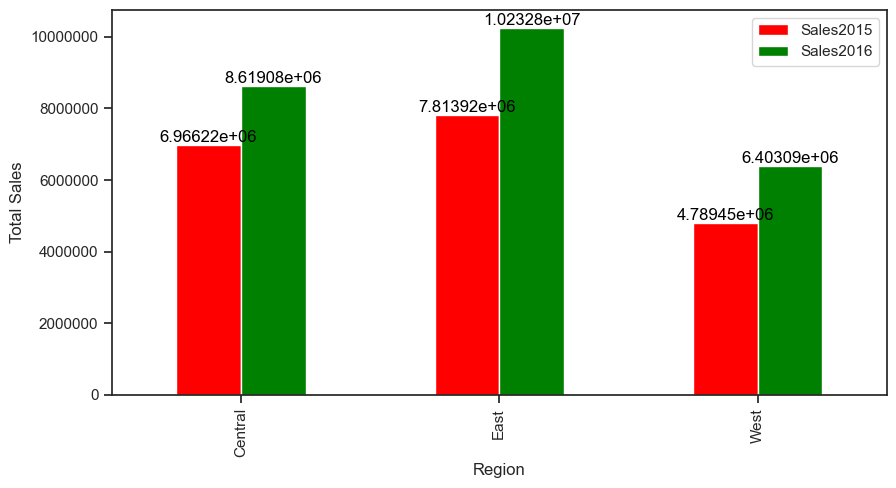

In [110]:
sales_data = sales_df[['Region','Sales2015','Sales2016']].groupby('Region').sum()
comp_sales = sales_data.plot(kind='bar', color=['red','green'], figsize=(10,5), ylabel='Total Sales')
comp_sales.bar_label(container = comp_sales.containers[0], label_type = 'edge', color='black')
comp_sales.bar_label(container = comp_sales.containers[1], label_type = 'edge', color='black')
plt.ticklabel_format(style='plain', axis='y') ## to prevent scientific notations in charts
plt.show()

#### Sales have improved in 2016 compared to 2015 in all the regions.
#### East region contributes the most followed by Central and West for both years

In [ ]:
## Q2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [116]:
sales_2016 = sales_df.groupby('Region').Sales2016.sum()

In [119]:
sales_2016

Region
Central    8.619079e+06
East       1.023275e+07
West       6.403088e+06
Name: Sales2016, dtype: float64

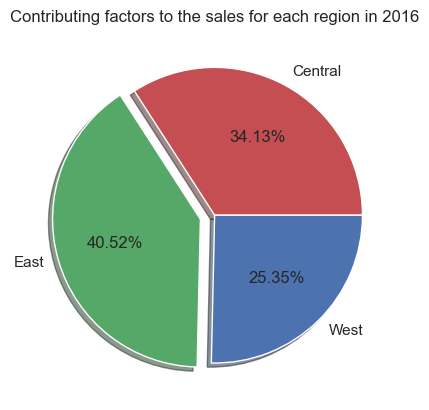

In [126]:
plt.pie(sales_2016,autopct='%1.2f%%',labels=['Central','East','West'],shadow=True,explode=[0.0,0.1,0.0],colors=['r','g','b'])
plt.title('Contributing factors to the sales for each region in 2016')
plt.show()

#### EAST Region has contributed the most

In [129]:
## Q3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [164]:
region_tier = sales_df[['Tier','Region','Sales2015','Sales2016']].groupby(by=['Region','Tier']).sum()

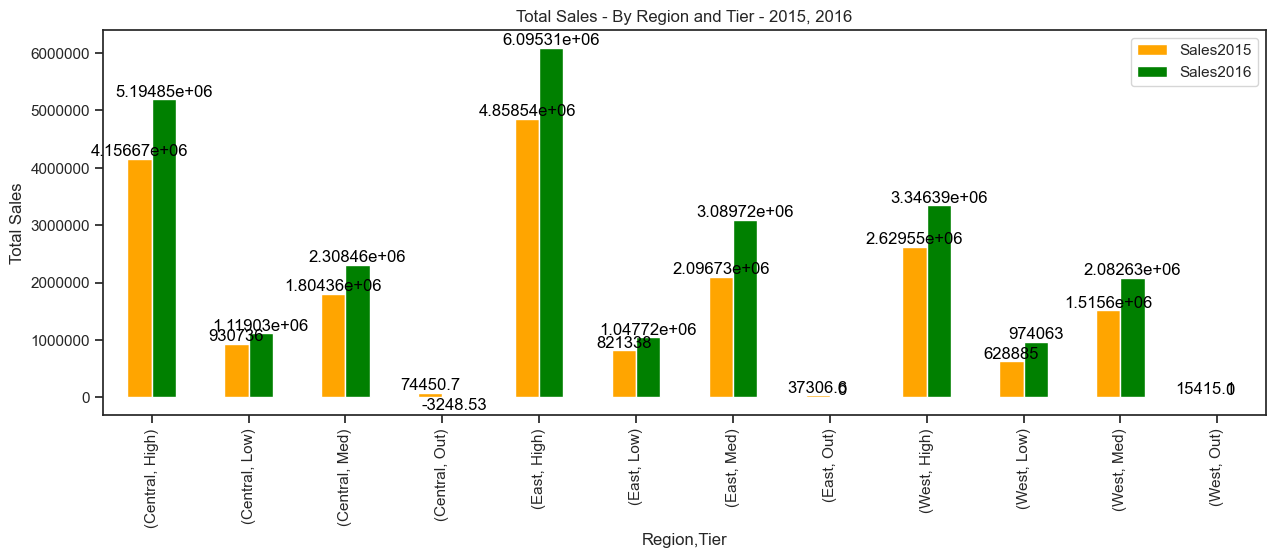

In [170]:
rt_sales_bar = region_tier.plot(kind='bar', figsize=(15,5), ylabel='Total Sales', color=['orange','green'])
rt_sales_bar.bar_label(container = rt_sales_bar.containers[0], label_type = 'edge', color='black')
rt_sales_bar.bar_label(container = rt_sales_bar.containers[1], label_type = 'edge', color='black')
plt.title('Total Sales - By Region and Tier - 2015, 2016')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### Tier - HIGH, stand out in all the three region - East, West and Central wrt Total Sales
#### Tier - Out is lowest performer in sales in all the regions

In [ ]:
## Q4. In East region, which state registered a decline in 2016 as compared to 2015?

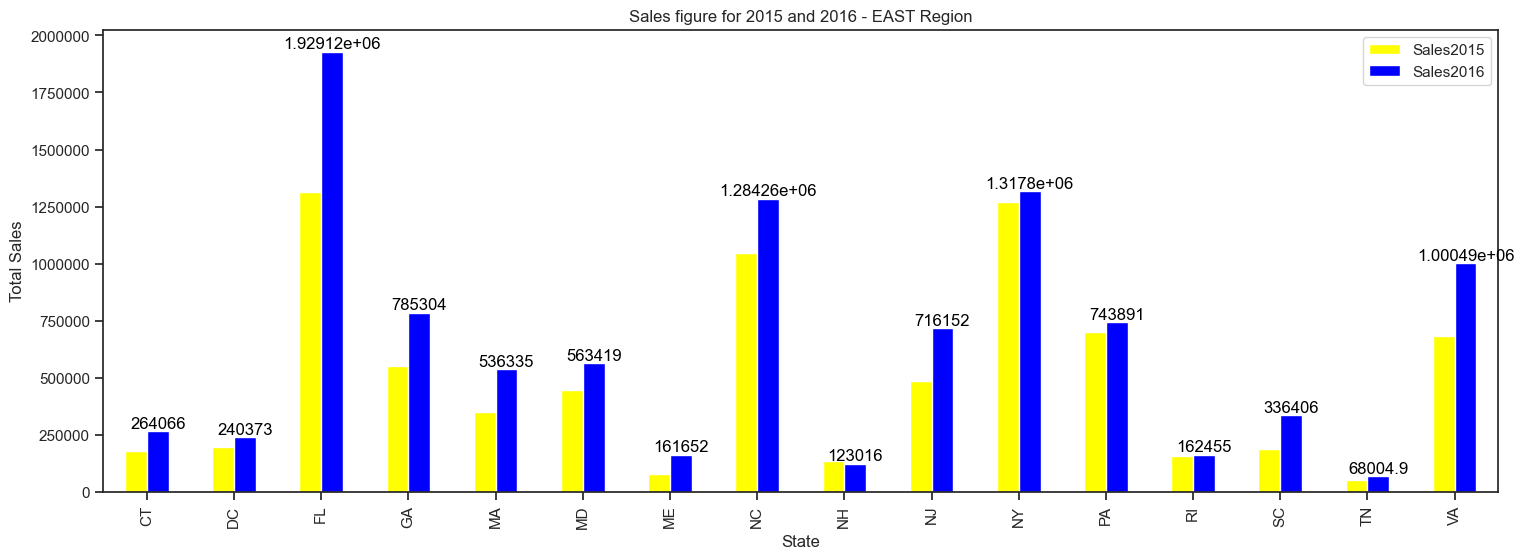

In [180]:
east_sales = sales_df[sales_df.Region == 'East'][['State','Sales2015','Sales2016']].groupby('State').sum()

comp_east = east_sales.plot(kind='bar', color=['yellow','blue'], figsize=(18,6), ylabel='Total Sales')
#comp_east.bar_label(container = comp_east.containers[0], label_type = 'edge', color='black')
comp_east.bar_label(container = comp_east.containers[1], label_type = 'edge', color='black')
plt.title('Sales figure for 2015 and 2016 - EAST Region')
plt.ticklabel_format(style='plain', axis='y') ## to prevent scientific notations in charts
plt.show()

#### In EAST Region, State NH has seen decline in sales for 2016 compared to 2015

In [ ]:
## Q5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [184]:
high_units = sales_df[sales_df.Tier == 'High'][['Division','Units2015','Units2016']].groupby('Division').sum()

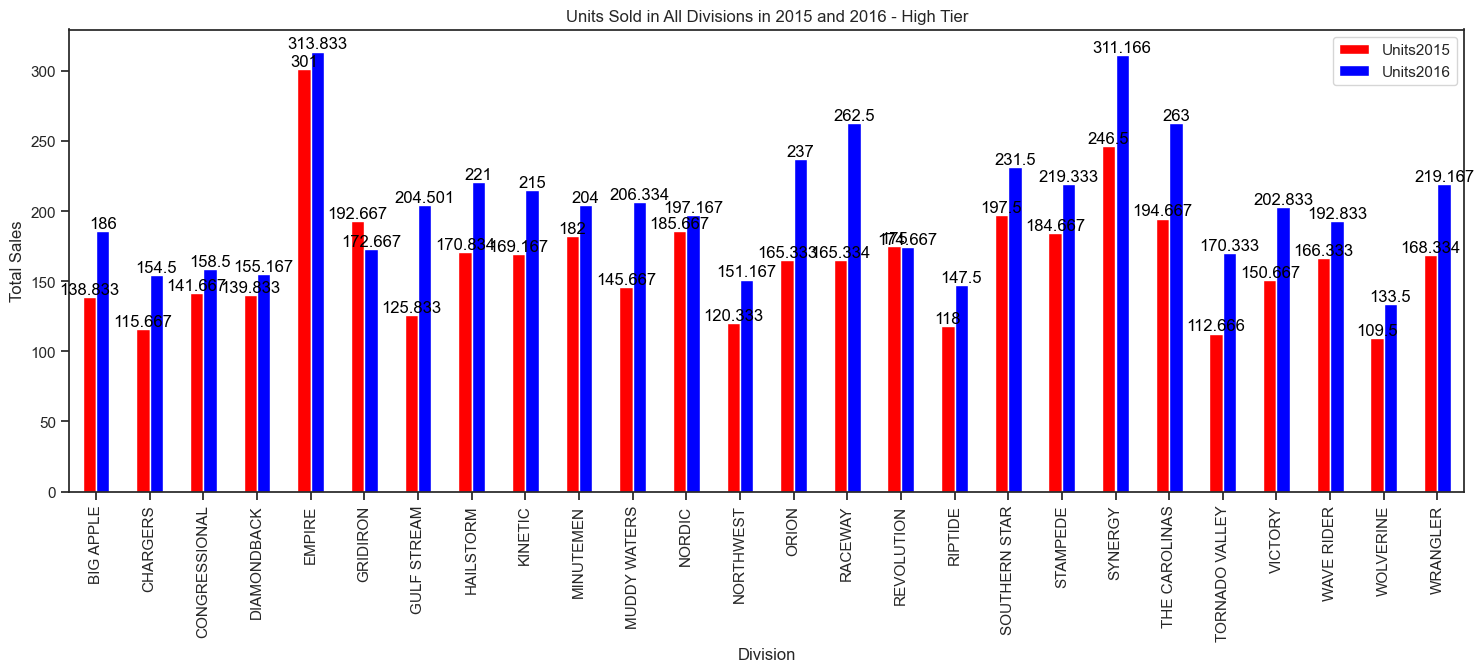

In [186]:
comp_high = high_units.plot(kind='bar', color=['red','blue'], figsize=(18,6), ylabel='Total Sales')
comp_high.bar_label(container = comp_high.containers[0], label_type = 'edge', color='black')
comp_high.bar_label(container = comp_high.containers[1], label_type = 'edge', color='black')
plt.title('Units Sold in All Divisions in 2015 and 2016 - High Tier')
plt.ticklabel_format(style='plain', axis='y') ## to prevent scientific notations in charts
plt.show()

#### GRIDIRON and REVOLUTION Division saw a decline in number of units sold in 2016 compared to 2015

In [ ]:
## Q6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. 
##The Quarters are based on months and defined as -
##• Jan - Mar : Q1
##• Apr - Jun : Q2
##• Jul - Sep : Q3
##• Oct - Dec : Q4 

In [188]:
sales_df.Month.unique()

array(['Aug', 'Oct', 'Jun', 'Mar', 'Sep', 'Jul', 'Feb', 'Apr', 'Nov',
       'May', 'Dec', 'Jan'], dtype=object)

In [193]:
q1,q2,q3,q4 = ['Jan','Feb','Mar'],['Apr','May','Jun'],['Jul','Aug','Sep'],['Oct','Nov','Dec']
sales_df['Qtr'] = np.where(sales_df.Month.isin(q1),'Q1',np.where(sales_df.Month.isin(q2),'Q2',np.where(sales_df.Month.isin(q3),'Q3','Q4')))

In [195]:
sales_df[['Month','Qtr']]

,Month,Qtr
0,Aug,Q3
1,Oct,Q4
2,Jun,Q2
3,Mar,Q1
4,Sep,Q3
...,...,...
3704,Feb,Q1
3705,Aug,Q3
3706,Nov,Q4
3707,Jan,Q1


In [ ]:
## Q7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [196]:
sales_df[['Qtr','Sales2015','Sales2016']].groupby('Qtr').sum()

,Sales2015,Sales2016
Qtr,,
Q1,4.857047e+06,6.114912e+06
Q2,4.621730e+06,6.284866e+06
Q3,5.232424e+06,6.561415e+06
Q4,4.858387e+06,6.293723e+06


In [197]:
qtr_sales = sales_df[['Qtr','Sales2015','Sales2016']].groupby('Qtr').sum()

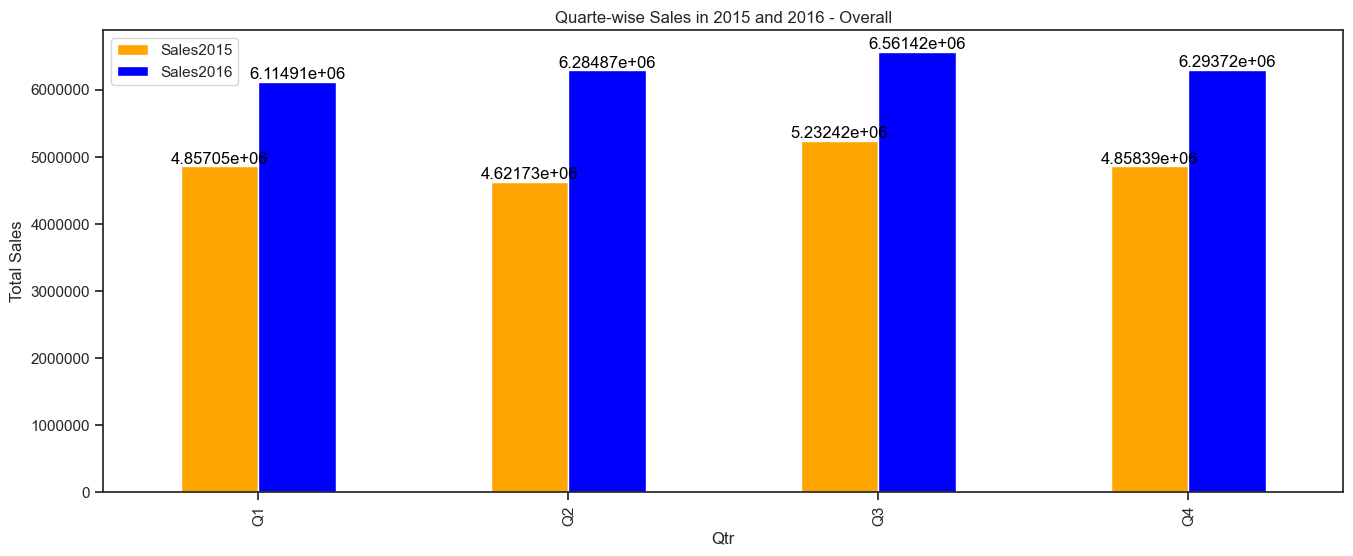

In [198]:
comp_qtr = qtr_sales.plot(kind='bar', color=['orange','blue'], figsize=(16,6), ylabel='Total Sales')
comp_qtr.bar_label(container = comp_qtr.containers[0], label_type = 'edge', color='black')
comp_qtr.bar_label(container = comp_qtr.containers[1], label_type = 'edge', color='black')
plt.title('Quarte-wise Sales in 2015 and 2016 - Overall')
plt.ticklabel_format(style='plain', axis='y') ## to prevent scientific notations in charts
plt.show()

#### All the Quarters have performed well in 2016 compared to 2015 wrt SALES figure

In [199]:
## Q8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
## (Draw 4 pie charts representing a Quarter for each Tier)

In [205]:
sales_df[sales_df.Qtr == 'Q3'].groupby('Tier').Sales2016.sum().abs()

Tier
High    3.844746e+06
Low     7.580313e+05
Med     1.961886e+06
Out     3.248530e+03
Name: Sales2016, dtype: float64

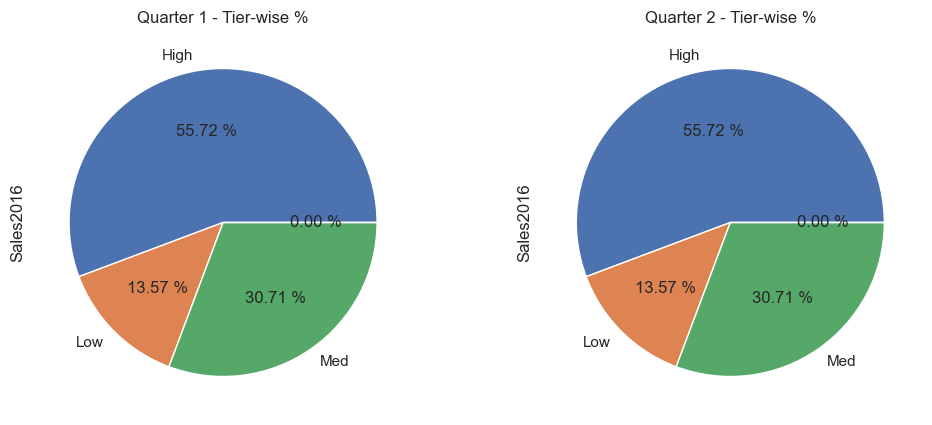

In [208]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sales_df[sales_df.Qtr == 'Q1'].groupby('Tier').Sales2016.sum().plot(kind='pie', autopct='%1.2f %%')
plt.title('Quarter 1 - Tier-wise %')

plt.subplot(1, 2, 2)
sales_df[sales_df.Qtr == 'Q1'].groupby('Tier').Sales2016.sum().plot(kind='pie', autopct='%1.2f %%')
plt.title('Quarter 2 - Tier-wise %')

plt.show()

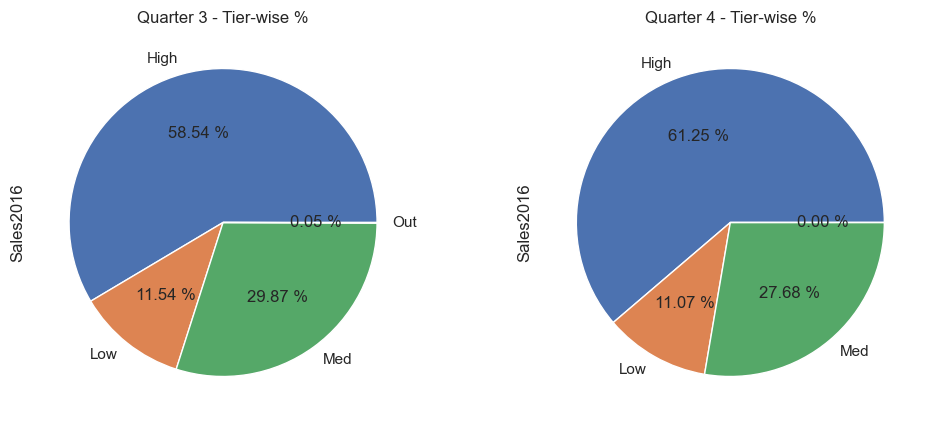

In [210]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sales_df[sales_df.Qtr == 'Q3'].groupby('Tier').Sales2016.sum().abs().plot(kind='pie', autopct='%1.2f %%')
plt.title('Quarter 3 - Tier-wise %')

plt.subplot(1, 2, 2)
sales_df[sales_df.Qtr == 'Q4'].groupby('Tier').Sales2016.sum().plot(kind='pie', autopct='%1.2f %%')
plt.title('Quarter 4 - Tier-wise %')

plt.show()

##  -- ENDS -- Python Visualisation CS--